## <b>  SYSC5809: THE INTERNET OF THINGS  <br >Carleton University - FALL 2025 </b>
## <b> <center> <u>PROJECT:</u> <u>ADVERSARIAL MACHINE LEARNING</u> </center> </b>

<h5> <b> GROUP 2: </b>
<p> - Karamoko Soumare <br>
    - Diana Addae </p> <br>

We are using the CICIDS2017 Dataset to simulate network traffic in a smart home system. We are gowing to create an intrusion detection system using baseline machine learning models. And then we will use the same models to intoduce an adversarial attack and visualize the new results. With the adversarial attacks we will retrain the model as defense mechanism.


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')

In [3]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,1266342,41,44,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.16-192.168.10.50-60058-22-6,192.168.10.16,60058,192.168.10.50,22,6,7/7/2017 1:00,1319353,41,44,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,160,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.12-192.168.10.50-35398-22-6,192.168.10.12,35398,192.168.10.50,22,6,7/7/2017 1:00,1303488,41,42,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.50,22,192.168.10.12,35396,6,7/7/2017 1:00,77,1,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


The first step of our Code is to do some feature engineering so that we can have a usable dataset for our ML algorithms.

In [4]:
df.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [5]:
# Encoding categorical labels to numerical values
encoder = LabelEncoder()
df[' Label'] = encoder.fit_transform(df[' Label'])

In [6]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,1266342,41,44,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,192.168.10.16-192.168.10.50-60058-22-6,192.168.10.16,60058,192.168.10.50,22,6,7/7/2017 1:00,1319353,41,44,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,160,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,192.168.10.12-192.168.10.50-35398-22-6,192.168.10.12,35398,192.168.10.50,22,6,7/7/2017 1:00,1303488,41,42,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.50,22,192.168.10.12,35396,6,7/7/2017 1:00,77,1,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
df[' Label'].value_counts().sum

<bound method Series.sum of  Label
1    158930
0    127537
Name: count, dtype: int64>

In [8]:
# Handling missing and infinite values
df = df.fillna(0) 
df = df.replace([np.inf, -np.inf], 0)

In [9]:
# Check for any remaining missing values
df = df.dropna()

In [10]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,1266342,41,44,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,192.168.10.16-192.168.10.50-60058-22-6,192.168.10.16,60058,192.168.10.50,22,6,7/7/2017 1:00,1319353,41,44,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,160,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,192.168.10.12-192.168.10.50-35398-22-6,192.168.10.12,35398,192.168.10.50,22,6,7/7/2017 1:00,1303488,41,42,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.50,22,192.168.10.12,35396,6,7/7/2017 1:00,77,1,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [11]:
# Check for any remaining missing values
df.isnull().sum()

Flow ID              0
 Source IP           0
 Source Port         0
 Destination IP      0
 Destination Port    0
                    ..
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
 Label               0
Length: 85, dtype: int64

In [12]:
# Feature selection
new_columns=[' Destination Port', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packets/s', ' Min Packet Length',
       ' PSH Flag Count', ' URG Flag Count', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' min_seg_size_forward']

After feature engineering, now we have to start defining and training our ML model

In [13]:
# Splitting features and labels
X = df.drop(' Label', axis=1)
y = df[' Label']

In [14]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[new_columns]
X_test = X_test[new_columns]


In [15]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)


In [37]:
# Printing accuracy scores and classification report

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25532
           1       1.00      1.00      1.00     31762

    accuracy                           1.00     57294
   macro avg       1.00      1.00      1.00     57294
weighted avg       1.00      1.00      1.00     57294

Accuracy Score: 0.9996858309770656


In [38]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [40]:
# Printing accuracy scores and classification report
print("Classification Report random forrest:\n", classification_report(y_test, y_pred))
print("Accuracy Score random forest:", accuracy_score(y_test, y_pred))

Classification Report random forrest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25532
           1       1.00      1.00      1.00     31762

    accuracy                           1.00     57294
   macro avg       1.00      1.00      1.00     57294
weighted avg       1.00      1.00      1.00     57294

Accuracy Score random forest: 0.9996858309770656


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [41]:
#DNN model
def create_dnn_model(input_shape):
    inputs = tf.keras.Input(shape=(input_shape,))
    x = tf.keras.layers.Dense(64, activation='relu')(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

dnn_model = create_dnn_model(X_train.shape[1])
dnn_model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype("int32")

Epoch 1/3
   7/5730 ━━━━━━━━━━━━━━━━━━━━ 1:42 18ms/step - accuracy: 0.3496 - loss: 0.7264

/Users/karamoko/Desktop/SYSC5809/project/Demo/.venv/lib/python3.13/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


5730/5730 ━━━━━━━━━━━━━━━━━━━━ 101s 18ms/step - accuracy: 0.9938 - loss: 0.0197 - val_accuracy: 0.9971 - val_loss: 0.0076
Epoch 2/3
5730/5730 ━━━━━━━━━━━━━━━━━━━━ 101s 18ms/step - accuracy: 0.9969 - loss: 0.0088 - val_accuracy: 0.9964 - val_loss: 0.0089
Epoch 3/3
5730/5730 ━━━━━━━━━━━━━━━━━━━━ 100s 17ms/step - accuracy: 0.9971 - loss: 0.0077 - val_accuracy: 0.9970 - val_loss: 0.0078
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [42]:
# Printing acc score and classification report on dnn
# Printing acc score and classification report on dnn
y_pred_dnn_flat = y_pred_dnn.ravel() if hasattr(y_pred_dnn, "ravel") else y_pred_dnn
print("Classification Report on DNN:\n", classification_report(y_test, y_pred_dnn_flat))
print("Accuracy Score on DNN:", accuracy_score(y_test, y_pred_dnn_flat))

Classification Report on DNN:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     25532
           1       1.00      0.99      1.00     31762

    accuracy                           1.00     57294
   macro avg       1.00      1.00      1.00     57294
weighted avg       1.00      1.00      1.00     57294

Accuracy Score on DNN: 0.9968059482668342


### Adversarial Attacks to fool the model:

In [43]:
# --- Helper: ensure tf 2.x eager mode (default) ---
tf.config.run_functions_eagerly(True)

#### FGSM ATTACK CONFIGURATION:

In [44]:
#FGSM Attack Implementation
def fgsm_attack(model, images, labels, epsilon=0.01, clip_min=-np.inf, clip_max=np.inf):
    # Convert images and labels to tensors
    x_tensor = tf.convert_to_tensor(images, dtype=tf.float32)
    y_tensor = tf.convert_to_tensor(labels, dtype=tf.int32)

    # Determine appropriate loss and label dtype/shape based on model output
    preds_sample = model(x_tensor[:1])
    if int(preds_sample.shape[-1]) == 1:
        loss_object = tf.keras.losses.BinaryCrossentropy()
        y_tensor = tf.convert_to_tensor(labels, dtype=tf.float32)
        if y_tensor.shape.ndims == 1:
            y_tensor = tf.expand_dims(y_tensor, -1)
    else:
        loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
        y_tensor = tf.convert_to_tensor(labels, dtype=tf.int32)

    # Record the gradients with respect to the input image
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        predictions = model(x_tensor)
        loss = loss_object(y_tensor, predictions)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, x_tensor)
    signed_grad = tf.sign(gradient)

    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_x = x_tensor + epsilon * signed_grad
    # Adding clipping to maintain [clip_min, clip_max] range
    perturbed_x = tf.clip_by_value(perturbed_x, clip_min, clip_max)

    return perturbed_x.numpy()

In [25]:
# DNN Surrogate Model because FGSM requires a differentiable model
#Logistic Regression and Random Forest are not differentiable, so we build a surrogate DNN model to approximate their behavior.
try:
    surrogate  # check existence
    print("Using existing surrogate model.")
except NameError:
    print("Surrogate not found — building & training a small surrogate DNN.")
    input_dim = X_train.shape[1]
    n_classes = len(np.unique(y_train))
    surrogate = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(input_dim,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(n_classes, activation='softmax')
    ])
    surrogate.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    surrogate.fit(X_train, y_train, epochs=8, batch_size=512, validation_split=0.1, verbose=1)

# --- Determine scaled min/max for clipping (useful to keep features realistic) ---
scaled_min = np.min(np.vstack([X_train, X_test]), axis=0)
scaled_max = np.max(np.vstack([X_train, X_test]), axis=0)

Surrogate not found — building & training a small surrogate DNN.
Epoch 1/8
  4/403 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5829 - loss: 0.6733 

/Users/karamoko/Desktop/SYSC5809/project/Demo/.venv/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/Users/karamoko/Desktop/SYSC5809/project/Demo/.venv/lib/python3.13/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


403/403 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9884 - loss: 0.0427 - val_accuracy: 0.9954 - val_loss: 0.0118
Epoch 2/8
403/403 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9954 - loss: 0.0125 - val_accuracy: 0.9974 - val_loss: 0.0086
Epoch 3/8
403/403 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9964 - loss: 0.0102 - val_accuracy: 0.9984 - val_loss: 0.0082
Epoch 4/8
403/403 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9969 - loss: 0.0090 - val_accuracy: 0.9971 - val_loss: 0.0072
Epoch 5/8
403/403 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9972 - loss: 0.0080 - val_accuracy: 0.9969 - val_loss: 0.0071
Epoch 6/8
403/403 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9975 - loss: 0.0076 - val_accuracy: 0.9969 - val_loss: 0.0075
Epoch 7/8
403/403 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9975 - loss: 0.0073 - val_accuracy: 0.9984 - val_loss: 0.0057
Epoch 8/8
403/403 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9977 - loss: 0.0068 - val_accuracy: 0.9969 - val

In [26]:
# Adversarial test on Logistic Regression model
X_test_adv = fgsm_attack(surrogate, X_test, y_test, epsilon=0.1, clip_min=X_test.min(), clip_max=X_test.max())
y_pred_log_adv = log_model.predict(X_test_adv)  

# Printing accuracy scores and classification report for adversarial examples
print("Adversarial Classification Report on LogReg:\n", classification_report(y_test, y_pred_log_adv))
print("Adversarial Accuracy Score on LogReg:", accuracy_score(y_test, y_pred_log_adv))

Adversarial Classification Report on LogReg:
               precision    recall  f1-score   support

           0       0.50      0.96      0.66     25532
           1       0.88      0.22      0.35     31762

    accuracy                           0.55     57294
   macro avg       0.69      0.59      0.50     57294
weighted avg       0.71      0.55      0.49     57294

Adversarial Accuracy Score on LogReg: 0.5500401438195972


In [27]:
# Adversarial test on Random Forest model
X_test_adv_rf = fgsm_attack(surrogate, X_test, y_test, epsilon=0.1, clip_min=X_test.min(), clip_max=X_test.max())
y_pred_rf_adv = rf_model.predict(X_test_adv_rf) 

# Printing accuracy scores and classification report for adversarial examples
print("Adversarial Classification Report on Random Forest:\n", classification_report(y_test, y_pred_rf_adv))
print("Adversarial Accuracy Score on Random Forest:", accuracy_score(y_test, y_pred_rf_adv))

Adversarial Classification Report on Random Forest:
               precision    recall  f1-score   support

           0       0.44      0.97      0.60     25532
           1       0.00      0.00      0.00     31762

    accuracy                           0.43     57294
   macro avg       0.22      0.48      0.30     57294
weighted avg       0.20      0.43      0.27     57294

Adversarial Accuracy Score on Random Forest: 0.43184277585785596


In [45]:
# Adversarial test on DNN model
X_test_adv_dnn = fgsm_attack(dnn_model, X_test, y_test, epsilon=0.1, clip_min=X_test.min(), clip_max=X_test.max())
y_pred_dnn_adv = (dnn_model.predict(X_test_adv_dnn) > 0.5).astype("int32")  

# Printing accuracy scores and classification report for adversarial examples
y_pred_dnn_adv_flat = y_pred_dnn_adv.ravel() if hasattr(y_pred_dnn_adv, "ravel") else y_pred_dnn_adv
print("Adversarial Classification Report on DNN with FGSM:\n", classification_report(y_test, y_pred_dnn_adv_flat))
print("Adversarial Accuracy Score on DNN with FGSM:", accuracy_score(y_test, y_pred_dnn_adv_flat))

  81/1791 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

/Users/karamoko/Desktop/SYSC5809/project/Demo/.venv/lib/python3.13/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1791/1791 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Adversarial Classification Report on DNN with FGSM:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85     25532
           1       0.96      0.75      0.84     31762

    accuracy                           0.85     57294
   macro avg       0.86      0.86      0.85     57294
weighted avg       0.87      0.85      0.85     57294

Adversarial Accuracy Score on DNN with FGSM: 0.846807693650295


#### PGD ATTACK CONFIGURATION:

In [29]:
# PGD Attack Implementation
def pgd_attack(model, images, labels, epsilon=0.1, alpha=0.01, iters=40, clip_min=None, clip_max=None):
    """
    PGD (untargeted) attack.
    - If clip_min/clip_max are None or scalars, derive per-feature bounds from `images`.
    - Use correct label shape for binary outputs (expand dims).
    """
    # Convert inputs
    images = np.asarray(images, dtype=np.float32)
    x_tensor = tf.convert_to_tensor(images, dtype=tf.float32)

    # Derive sensible per-feature clipping if user passed scalar or None
    if clip_min is None:
        clip_min = np.min(images, axis=0)
    if clip_max is None:
        clip_max = np.max(images, axis=0)
    clip_min = tf.convert_to_tensor(np.asarray(clip_min, dtype=np.float32))
    clip_max = tf.convert_to_tensor(np.asarray(clip_max, dtype=np.float32))

    # Prepare labels and loss depending on model output shape
    preds_sample = model(x_tensor[:1])
    if int(preds_sample.shape[-1]) == 1:
        loss_object = tf.keras.losses.BinaryCrossentropy()
        y_tensor = tf.convert_to_tensor(labels, dtype=tf.float32)
        if y_tensor.ndim == 1:
            y_tensor = tf.expand_dims(y_tensor, -1)
    else:
        loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
        y_tensor = tf.convert_to_tensor(labels, dtype=tf.int32)

    # Initialize perturbation
    perturbed_x = tf.identity(x_tensor)

    for i in range(iters):
        with tf.GradientTape() as tape:
            tape.watch(perturbed_x)
            predictions = model(perturbed_x)
            loss = loss_object(y_tensor, predictions)

        gradient = tape.gradient(loss, perturbed_x)
        # If gradient is None (rare), break
        if gradient is None:
            break
        signed_grad = tf.sign(gradient)

        # step (maximize loss)
        perturbed_x = perturbed_x + alpha * signed_grad

        # Project back into epsilon-ball around original inputs
        perturbation = tf.clip_by_value(perturbed_x - x_tensor, -epsilon, epsilon)
        perturbed_x = x_tensor + perturbation

        # Clip to valid feature bounds (supports per-feature bounds)
        perturbed_x = tf.clip_by_value(perturbed_x, clip_min, clip_max)

    return perturbed_x.numpy()

In [30]:
# Adversarial test on Logistic Regression model using PGD
X_test_adv_pgd = pgd_attack(surrogate, X_test, y_test, epsilon=0.1, alpha=0.01, iters=100, clip_min=X_test.min(), clip_max=X_test.max())
y_pred_log_adv_pgd = log_model.predict(X_test_adv_pgd)

# Printing accuracy scores and classification report for PGD adversarial examples
print("PGD Adversarial Classification Report on LogReg:\n", classification_report(y_test, y_pred_log_adv_pgd))
print("PGD Adversarial Accuracy Score on LogReg:", accuracy_score(y_test, y_pred_log_adv_pgd))

PGD Adversarial Classification Report on LogReg:
               precision    recall  f1-score   support

           0       0.50      0.96      0.65     25532
           1       0.87      0.22      0.35     31762

    accuracy                           0.55     57294
   macro avg       0.68      0.59      0.50     57294
weighted avg       0.70      0.55      0.48     57294

PGD Adversarial Accuracy Score on LogReg: 0.5481900373512061


In [31]:
# Adversarial test on Random Forest model using PGD
X_test_adv_rf_pgd = pgd_attack(surrogate, X_test, y_test, epsilon=0.1, alpha=0.01, iters=40, clip_min=X_test.min(), clip_max=X_test.max())
y_pred_rf_adv_pgd = rf_model.predict(X_test_adv_rf_pgd)

# Printing accuracy scores and classification report for PGD adversarial examples
print("PGD Adversarial Classification Report on Random Forest:\n", classification_report(y_test, y_pred_rf_adv_pgd))
print("PGD Adversarial Accuracy Score on Random Forest:", accuracy_score(y_test, y_pred_rf_adv_pgd))

PGD Adversarial Classification Report on Random Forest:
               precision    recall  f1-score   support

           0       0.44      0.97      0.60     25532
           1       0.00      0.00      0.00     31762

    accuracy                           0.43     57294
   macro avg       0.22      0.48      0.30     57294
weighted avg       0.20      0.43      0.27     57294

PGD Adversarial Accuracy Score on Random Forest: 0.4318776835270709


In [46]:
# Adversarial pgd test on DNN model
X_test_adv_pgd_dnn= pgd_attack(dnn_model, X_test, y_test, epsilon=0.1, alpha=0.01, iters=40, clip_min=X_test.min(), clip_max=X_test.max())
y_pred_dnn_adv_pgd = (dnn_model.predict(X_test_adv_pgd_dnn) > 0.5).astype("int32")

# Printing accuracy scores and classification report for PGD adversarial examples
y_pred_dnn_adv_pgd_flat = y_pred_dnn_adv_pgd.ravel() if hasattr(y_pred_dnn_adv_pgd, "ravel") else y_pred_dnn_adv_pgd
print("PGD Adversarial Classification Report on DNN:\n", classification_report(y_test, y_pred_dnn_adv_pgd_flat))
print("PGD Adversarial Accuracy Score on DNN:", accuracy_score(y_test, y_pred_dnn_adv_pgd_flat))

 100/1791 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

/Users/karamoko/Desktop/SYSC5809/project/Demo/.venv/lib/python3.13/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1791/1791 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
PGD Adversarial Classification Report on DNN:
               precision    recall  f1-score   support

           0       0.74      0.96      0.84     25532
           1       0.96      0.73      0.83     31762

    accuracy                           0.84     57294
   macro avg       0.85      0.85      0.84     57294
weighted avg       0.86      0.84      0.84     57294

PGD Adversarial Accuracy Score on DNN: 0.8362481237127797


### RESULT VISUALISATION AND COMPARISON:

Summary of Results:
                 Model  Clean Accuracy:  FGSM Adv acc  PGD Adv acc:
0  Logistic Regression         0.986072      0.550040      0.548190
1        Random Forest         0.999686      0.431843      0.431878
2                  DNN         0.996806      0.846808      0.836248


Text(0.5, 1.0, 'Model Accuracy under Clean and Adversarial Conditions')

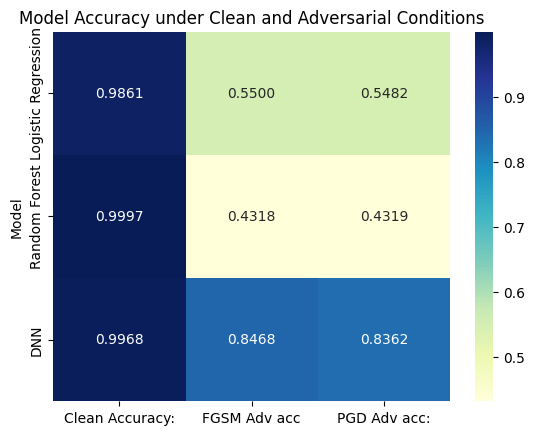

In [47]:
# Summary of Results, graphical or tabular representation
print("Summary of Results:")
results = {
    "Model": ["Logistic Regression", "Random Forest", "DNN"],
    
    "Clean Accuracy:": [accuracy_score(y_test, log_model.predict(X_test)),
                        accuracy_score(y_test, rf_model.predict(X_test)),
                        accuracy_score(y_test, y_pred_dnn_flat)],
    "FGSM Adv acc": [accuracy_score(y_test, y_pred_log_adv),
                                accuracy_score(y_test, y_pred_rf_adv),
                                accuracy_score(y_test, y_pred_dnn_adv_flat)],
    "PGD Adv acc:": [accuracy_score(y_test, y_pred_log_adv_pgd),
                                accuracy_score(y_test, y_pred_rf_adv_pgd),
                                accuracy_score(y_test, y_pred_dnn_adv_pgd_flat)]
}
results_df = pd.DataFrame(results)
print(results_df)

table = results_df.set_index('Model')
sns.heatmap(table, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Model Accuracy under Clean and Adversarial Conditions")


### DEFENSE METHODS:

In [34]:
# Create adversarial training data 
X_train_adv_pgd = pgd_attack(surrogate, X_train, y_train, epsilon=0.1, alpha=0.01, iters=40, clip_min=X_train.min(), clip_max=X_train.max())
y_train_adv = y_train.copy()    
X_train_combined = np.vstack((X_train, X_train_adv_pgd))
y_train_combined = np.hstack((y_train, y_train_adv))

In [35]:
# Retrain DNN on adversarial training data
dnn_model_adv = create_dnn_model(X_train.shape[1])
dnn_model_adv.fit(X_train_combined, y_train_combined, epochs=3, batch_size=32, validation_split=0.2)
y_pred_dnn_adv_retrained = (dnn_model_adv.predict(X_test_adv_pgd) > 0.5).astype("int32")

# Printing accuracy scores and classification report for retrained DNN on PGD adversarial examples
y_pred_dnn_adv_retrained_flat = y_pred_dnn_adv_retrained.ravel() if hasattr(y_pred_dnn_adv_retrained, "ravel") else y_pred_dnn_adv_retrained
print("Retrained DNN PGD Adversarial Classification Report:\n", classification_report(y_test, y_pred_dnn_adv_retrained_flat))
print("Retrained DNN PGD Adversarial Accuracy Score:", accuracy_score(y_test, y_pred_dnn_adv_retrained_flat))


Epoch 1/3
    7/11459 ━━━━━━━━━━━━━━━━━━━━ 3:35 19ms/step - accuracy: 0.4550 - loss: 0.7502

/Users/karamoko/Desktop/SYSC5809/project/Demo/.venv/lib/python3.13/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11459/11459 ━━━━━━━━━━━━━━━━━━━━ 192s 17ms/step - accuracy: 0.9944 - loss: 0.0174 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 2/3
11459/11459 ━━━━━━━━━━━━━━━━━━━━ 188s 16ms/step - accuracy: 0.9969 - loss: 0.0088 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 3/3
11459/11459 ━━━━━━━━━━━━━━━━━━━━ 192s 17ms/step - accuracy: 0.9977 - loss: 0.0064 - val_accuracy: 0.9997 - val_loss: 0.0011
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Retrained DNN PGD Adversarial Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25532
           1       1.00      1.00      1.00     31762

    accuracy                           1.00     57294
   macro avg       1.00      1.00      1.00     57294
weighted avg       1.00      1.00      1.00     57294

Retrained DNN PGD Adversarial Accuracy Score: 0.9996509233078508


/var/folders/tn/2ft1ffr16hb5dl_1cp3n2fwm0000gn/T/ipykernel_91757/2111130050.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette="viridis")


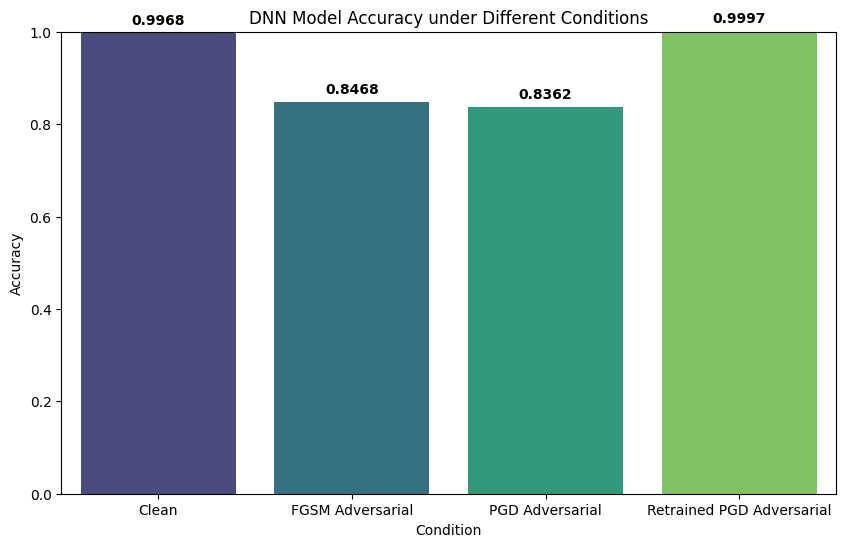

In [48]:
# DNN results Visualization for clean, FGSM, PGD, and retrained PGD
labels = ['Clean', 'FGSM Adversarial', 'PGD Adversarial', 'Retrained PGD Adversarial']
accuracies = [
    accuracy_score(y_test, y_pred_dnn_flat),
    accuracy_score(y_test, y_pred_dnn_adv_flat),
    accuracy_score(y_test, y_pred_dnn_adv_pgd_flat),
    accuracy_score(y_test, y_pred_dnn_adv_retrained_flat)
]

plt.figure(figsize=(10, 6)) 
sns.barplot(x=labels, y=accuracies, palette="viridis")
plt.ylim(0, 1)
plt.title("DNN Model Accuracy under Different Conditions")
plt.ylabel("Accuracy")
plt.xlabel("Condition")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontweight='bold')
plt.show()
